In [4]:
import sys
sys.path.append("/home/andrei/GitProjects/HeteroR/workflow/scripts")
from GRF_parser import parse_spacer

# Intro


In [5]:
%cd "/home/andrei/Data/HeteroR/results/direct_repeats/"
%ls

/home/andrei/Data/HeteroR/results/direct_repeats
DA62886/  DA63084/  DA63668/  DA63726/  DA63850/  DA64024/
DA63026/  DA63366/  DA63702/  DA63776/  DA63862/


Now I have some results of repeats analysis in 11 strains.
For strain DA62886 GRF found ound 1.4 million repeats with the following settings (minimal repeat length 10 bp, no mismatches):

`grf-main -i regions_output.fasta -c 2 -o DA62886_perfect_repeats_GRF_test -t 10 --min_tr 10 -f 1 --max_mismatch
0 --seed_mismatch 0 --max_space 204000 --min_space 500`

In [6]:
import glob
import pandas as pd


def make_repeats_df(spacer_file):
    with open(spacer_file) as f:
        output_lines = [line.rstrip() for line in f.readlines()]
    parsed_lines = [parse_spacer(line) for line in output_lines]
    spacer_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=parsed_lines)
    spacer_df["strain"] = spacer_file.split("/")[0]
    return spacer_df


# read spacer files and make DF for each
grf_results_df =pd.concat([make_repeats_df(file) for file in glob.glob("DA*/repeats/perfect.spacer.id")])

grf_results_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,123259,123269,323162,323172,10,DA63668
1,1,124227,124237,322983,322993,10,DA63668
2,1,124249,124259,322600,322610,10,DA63668
3,1,124164,124175,322029,322040,11,DA63668
4,1,125381,125393,323221,323233,12,DA63668
...,...,...,...,...,...,...,...
1556362,9,59429,59440,59970,59981,11,DA64024
1556363,9,49987,49997,50517,50527,10,DA64024
1556364,9,1096,1113,1612,1629,17,DA64024
1556365,9,67459,67469,67974,67984,10,DA64024


In [19]:
nrows_df = pd.DataFrame(grf_results_df["strain"].value_counts())
nrows_df = nrows_df.rename(columns={"strain": "counts"})
nrows_df["strain"] = nrows_df.index
nrows_df

,counts,strain
DA63862,1655405,DA63862
DA63726,1646327,DA63726
DA63026,1643019,DA63026
DA64024,1556367,DA64024
DA63850,1546413,DA63850
DA63366,1536320,DA63366
DA63776,1528953,DA63776
DA63668,1474281,DA63668
DA63702,1453787,DA63702
DA63084,1452385,DA63084


# Number of repeats per strain

<AxesSubplot:xlabel='strain', ylabel='counts'>

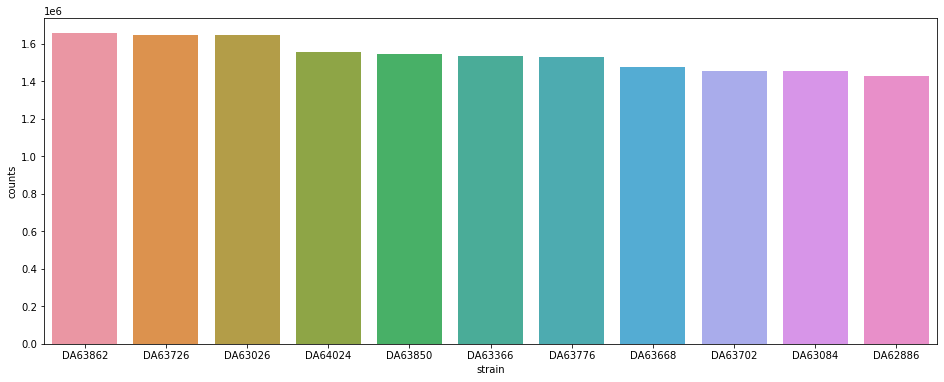

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,6))

sns.barplot(x="strain", y="counts", data=nrows_df)


# Repeat length distribution


[None]

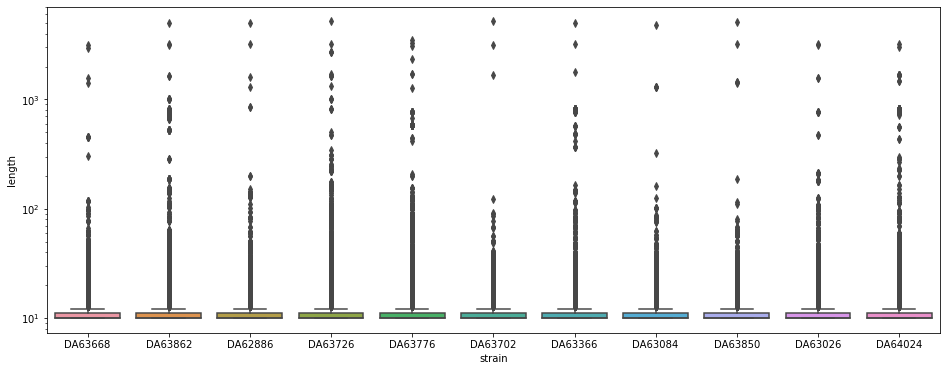

In [25]:
plt.figure(figsize=(16, 6))

bxplt = sns.boxplot(x="strain", y="length", data=grf_results_df)
bxplt.set(yscale="log")
